In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

#Import class Linear_Kalman_Black_Box from module LKBB
from LKBB import Linear_Kalman_Black_Box
import analysis

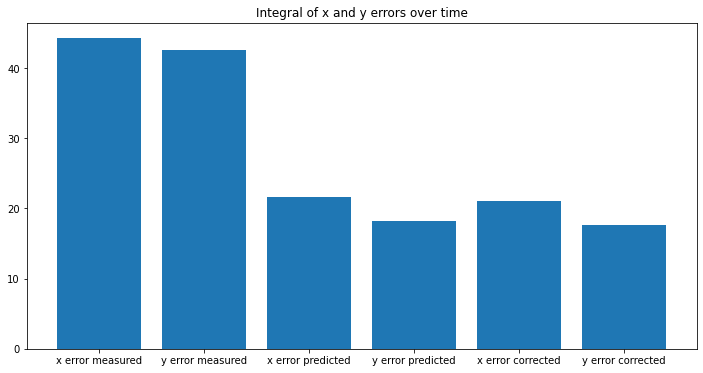

Elapsed time: 0.38228759999999995s


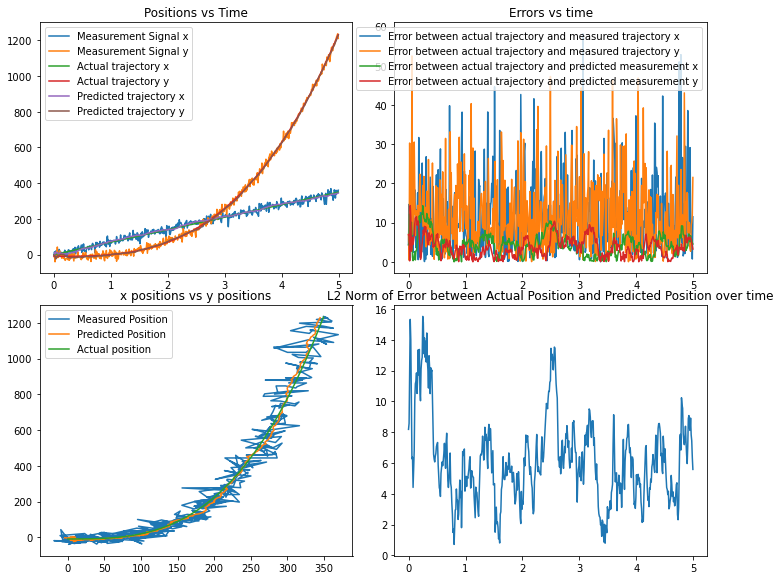

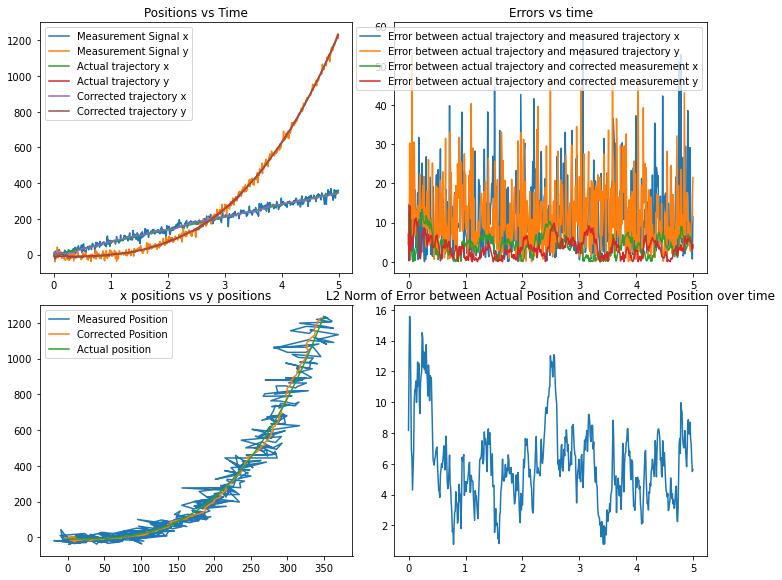

In [2]:
#Define timestep. For this example, I am using 100 FPS. I found that a higher framerate increases accuracy.
timestep = 1/100
#Create time array
t = np.arange(0,5,timestep)
#Define the actual trajectories of the x and y coordinate. In the actual code, this would be a part of the dataset 
#and does not need to be defined here.
x_actual = 70*t
y_actual = 10*(t**3-1)
#Define the std dev of the measurement noise and std dev of acceleration. Rather than treating these variables as what they 
#actually are, I treat them as parameters to tune. I had the best results with the following values.
sigma_measurement = .01
sigma_acceleration = .1
#Create a new filter
newFilter = Linear_Kalman_Black_Box(timestep,sigma_measurement,sigma_acceleration)

#Define a vector to store the simulated measurements. In the real code, these would store the positions of the objects as 
#calculated from the object detection algorithm.
x_measured = np.zeros(len(t))
y_measured = np.zeros(len(t))
for i in range (0,len(t)):
    #If it is the first iteration, detect the object first then call setInitialPosition. Because it is the first datapoint,
    #the algorithm can't predict a position yet.
    if i == 0:
        #Where I set x_measured and y_measured is where the object detection algorithm returns the measured position.
        #Note that the standard deviation of the noise is set to 15 pixels, but the parameter sigma_measurement was set
        #to .01. This is what I meant above when I said that the parameters fed into the constructor aren't what they actually
        #are. Even though the actual std dev of the noise is 15 pixels, I had better results with a value of .01 pixels.
        x_measured[i] = x_actual[i] + np.random.normal(0,15)
        y_measured[i] = y_actual[i] + np.random.normal(0,15)
        #Set the initial position to the first measurement
        newFilter.setInitialPosition(x_measured[i],y_measured[i])
    #If it isn't the first iteration, then the next position can be predicted to aid the object detection algorithm.
    else:
        #Get the predicted location
        x_prediction,y_prediction = newFilter.predict()
        #Here is where the object detection algorithm returns the measured position. The measured position is fed into
        #the update function, which corrects the measurement. This part of the algorithm helps make future predictions more 
        #accurate.
        x_measured[i] = x_actual[i] + np.random.normal(0,15)
        y_measured[i] = y_actual[i] + np.random.normal(0,15)
        newFilter.update(x_measured[i],y_measured[i])

#The code from here onward is purely for visualizing results, and is not necessary for the final version, but definitely can
#be useful.

#Once the loop concludes, the getCorrectedPositions function returns a list of the corrected x and y positions. 
x_list,y_list = newFilter.getCorrectedPositions()
#Once the loop concludes, the getPredictedPositions function returns a list of the predicted x and y positions. 
x_list_predicted,y_list_predicted = newFilter.getPredictedPositions()

#Run analysis while also showing how to get time using imported time module. I tried to implement this as a function, but it was
#giving me a hard time so I implemented it this way instead.
start = time.perf_counter()
analysis.analyzeResults(x_actual,y_actual,x_measured,y_measured,x_list_predicted,y_list_predicted,x_list,y_list,t)
end = time.perf_counter()
print('Elapsed time: ' + str(end-start)+'s')

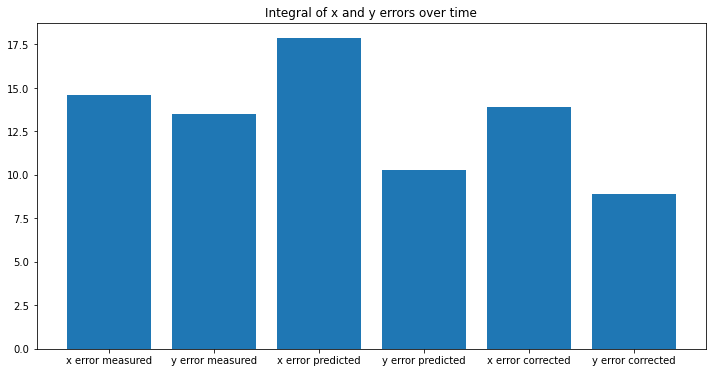

(<Figure size 720x576 with 4 Axes>, <Figure size 720x576 with 4 Axes>)

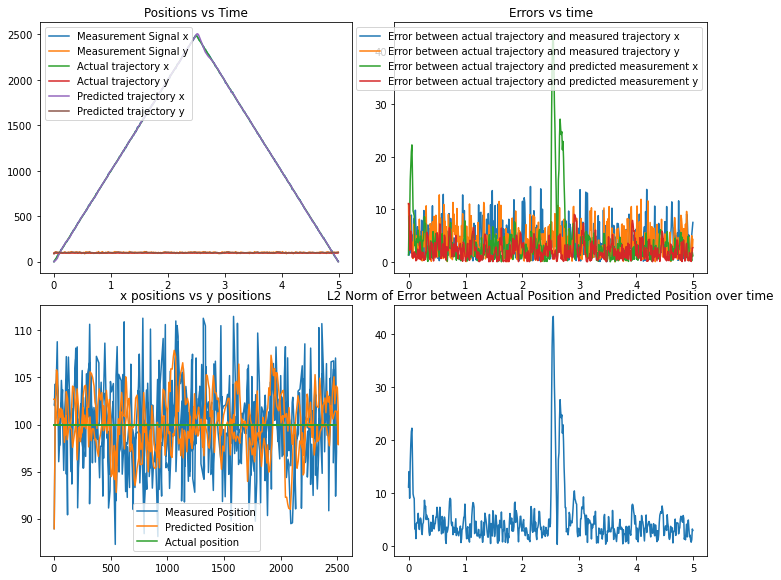

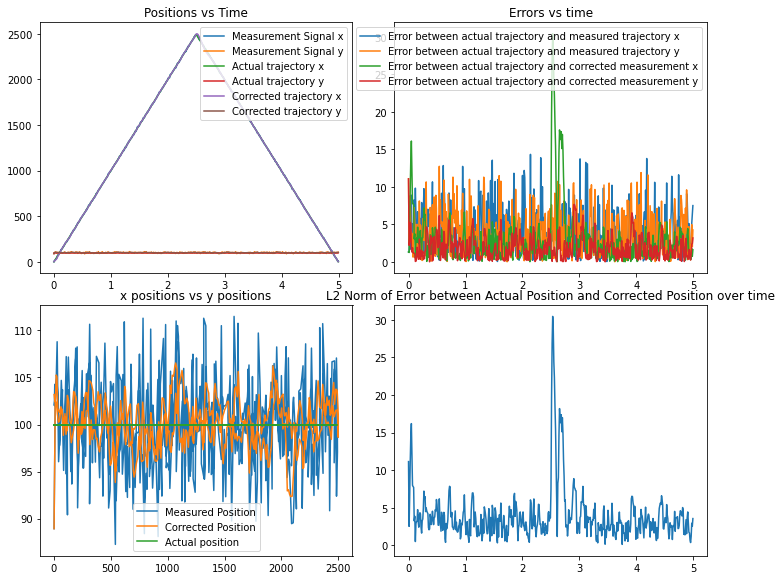

In [10]:
#Here I'm testing performance on circular motion. Out of all the functions I tried, the algorithm definitely struggles the most
#with sinusoids, but performs pretty well if the frequency is lower. In this case, the object is traveling at about 
#1000 pixels/s. It will perform better with a higher framerate, but I thought that 100 fps was probably a good practical limit.

#Define timestep. For this example, I am using 100 FPS. I found that a higher framerate increases accuracy.
timestep = 1/100
#Create time array
t = np.arange(0,5,timestep)
#Define the actual trajectories of the x and y coordinate. In the actual code, this would be a part of the dataset 
#and does not need to be defined here.
x_actual[0:250] = 1000*t[0:250]
x_actual[250:] = -1000*(t[250:]-t[249])+2500
y_actual = 100+0*t
#Define the std dev of the measurement noise and std dev of acceleration. Rather than treating these variables as what they 
#actually are, I treat them as parameters to tune. I had the best results with the following values.
sigma_measurement = 5
sigma_acceleration = .001
#Create a new filter
newFilter = Linear_Kalman_Black_Box(timestep,sigma_measurement,sigma_acceleration)

#Define a vector to store the simulated measurements. In the real code, these would store the positions of the objects as 
#calculated from the object detection algorithm.
x_measured = np.zeros(len(t))
y_measured = np.zeros(len(t))
for i in range (0,len(t)):
    #If it is the first iteration, detect the object first then call setInitialPosition. Because it is the first datapoint,
    #the algorithm can't predict a position yet.
    if i == 0:
        #Where I set x_measured and y_measured is where the object detection algorithm returns the measured position.
        x_measured[i] = x_actual[i] + np.random.normal(0,5)
        y_measured[i] = y_actual[i] + np.random.normal(0,5)
        #Set the initial position to the first measurement
        newFilter.setInitialPosition(x_measured[i],y_measured[i])
    #If it isn't the first iteration, then the next position can be predicted to aid the object detection algorithm.
    else:
        #Get the predicted location
        x_prediction,y_prediction = newFilter.predict()
        #Here is where the object detection algorithm returns the measured position, and the measured position fed into
        #the update function. This function corrects the measurement, which ensures future predictions are more accurate.
        x_measured[i] = x_actual[i] + np.random.normal(0,5)
        y_measured[i] = y_actual[i] + np.random.normal(0,5)
        newFilter.update(x_measured[i],y_measured[i])

#The code from here onward is purely for visualizing results, and is not necessary for the final version, but definitely can
#be useful.

#Once the loop concludes, the getCorrectedPositions function returns a list of the corrected x and y positions. 
x_list,y_list = newFilter.getCorrectedPositions()
#Once the loop concludes, the getPredictedPositions function returns a list of the predicted x and y positions. 
x_list_predicted,y_list_predicted = newFilter.getPredictedPositions()
#Run analysis
analysis.analyzeResults(x_actual,y_actual,x_measured,y_measured,x_list_predicted,y_list_predicted,x_list,y_list,t)